In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('lena.png', cv2.IMREAD_COLOR)
img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

In [10]:
change_percentage = 0.2

img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - 0.2
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + 0.2
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2RGB)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2RGB)

img_hls_change = np.hstack((img, img_hls_down, img_hls_up))


In [11]:
while(1):
    cv2.imshow('hls', img_hls_change)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_hist = cv2.equalizeHist(img_gray)

hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
hist_acl = cv2.calcHist([img_hist], [0], None, [256], [0, 256])

img_hist_all = np.hstack((img_gray, img_hist))

In [16]:
while(1):
    cv2.imshow('hist', img_hist_all)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

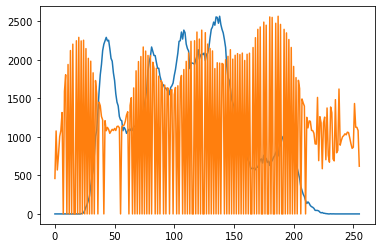

In [17]:
plt.plot(hist)
plt.plot(hist_acl)
plt.show()

In [25]:
equalHist_by_channel = [img[..., 0], img[..., 1], img[..., 2]]
equalHist_by_channel = [cv2.equalizeHist(i) for i in equalHist_by_channel]
img_bgr_equal = np.stack(equalHist_by_channel, axis=-1)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[..., -1] = cv2.equalizeHist(img_hsv[..., -1])
img_hsv_equal = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))

while(1):
    cv2.imshow('hist_R_H', img_bgr_equalHist)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [20]:
contrast = cv2.convertScaleAbs(img, alpha = 2.0, beta = 0)
lightness = cv2.convertScaleAbs(img, alpha = 1.0, beta = 50)

img_all_con = np.hstack((img, contrast, lightness))

while(1):
    cv2.imshow('con and light', img_all_con)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()